# Discovering MNE and MOABB

## MNE
> \[MNE is an\] Open-source Python package for exploring, visualizing, and analyzing human neurophysiological data: MEG, EEG, sEEG, ECoG, NIRS, and more.

More information and documentation can be found at https://mne.tools/stable/index.html


### Downloading a dataset

To discover the features of MNE, we will make use of MOABB to download an SSVEP BCI dataset. MOABB internally uses MNE for data representation, so the downloaded data will be returned in an MNE format.

The dataset used here is the `SSVEPExo` dataset from the University of Versailles [1].

> The datasets contains recording from 12 male and female subjects aged between 20 and 28 years. Informed consent was obtained from all subjects, each one has signed a form attesting her or his consent. The subject sits in an electric wheelchair, his right upper limb is resting on the exoskeleton. The exoskeleton is functional but is not used during the recording of this experiment.
\
A panel of size 20x30 cm is attached on the left side of the chair, with 3 groups of 4 LEDs blinking at different frequencies. Even if the panel is on the left side, the user could see it without moving its head. The subjects were asked to sit comfortably in the wheelchair and to follow the auditory instructions, they could move and blink freely.
\
A sequence of trials is proposed to the user. A trial begin by an audio cue indicating which LED to focus on, or to focus on a fixation point set at an equal distance from all LEDs for the reject class. A trial lasts 5 seconds and there is a 3 second pause between each trial. The evaluation is conducted during a session consisting of 32 trials, with 8 trials for each frequency (13Hz, 17Hz and 21Hz) and 8 trials for the reject class, i.e. when the subject is not focusing on any specific blinking LED.
\
There is between 2 and 5 sessions for each user, recorded on different days, by the same operators, on the same hardware and in the same conditions.

https://neurotechx.github.io/moabb/generated/moabb.datasets.SSVEPExo.html#moabb.datasets.SSVEPExo

In [1]:
from moabb.datasets import SSVEPExo

dataset = SSVEPExo()
dataset.download()
dataset.get_data()

{1: {'session_0': {'run_0': <Raw | subject01_run1_raw.fif, 9 x 57024 (222.7 s), ~3.9 MB, data loaded>,
   'run_1': <Raw | subject01_run2_raw.fif, 9 x 78144 (305.2 s), ~5.4 MB, data loaded>}},
 2: {'session_0': {'run_0': <Raw | subject02_run1_raw.fif, 9 x 71712 (280.1 s), ~4.9 MB, data loaded>,
   'run_1': <Raw | subject02_run2_raw.fif, 9 x 59456 (232.2 s), ~4.1 MB, data loaded>}},
 3: {'session_0': {'run_0': <Raw | subject03_run1_raw.fif, 9 x 63040 (246.2 s), ~4.3 MB, data loaded>,
   'run_1': <Raw | subject03_run2_raw.fif, 9 x 59040 (230.6 s), ~4.1 MB, data loaded>}},
 4: {'session_0': {'run_0': <Raw | subject04_run1_raw.fif, 9 x 63648 (248.6 s), ~4.4 MB, data loaded>,
   'run_1': <Raw | subject04_run2_raw.fif, 9 x 57120 (223.1 s), ~3.9 MB, data loaded>}},
 5: {'session_0': {'run_0': <Raw | subject05_run1_raw.fif, 9 x 58848 (229.9 s), ~4.1 MB, data loaded>,
   'run_1': <Raw | subject05_run2_raw.fif, 9 x 68576 (267.9 s), ~4.7 MB, data loaded>}},
 6: {'session_0': {'run_0': <Raw | subje

Let's create a variable `raw` containing the raw, unprocessed data from the first subject in this experiment. MNE gives a nice overview of the metadata of this EEG recording.

In [2]:
subj,session,run = 1, 'session_0', 'run_0'
raw = dataset.get_data(subjects=[subj])[subj][session][run]
raw

<Raw | subject01_run1_raw.fif, 9 x 57024 (222.7 s), ~3.9 MB, data loaded>

### Inspect raw data

MNE offers a lot of useful tools for data manipulation and visualization. You can plot the locations of the elctrodes used to record the data:

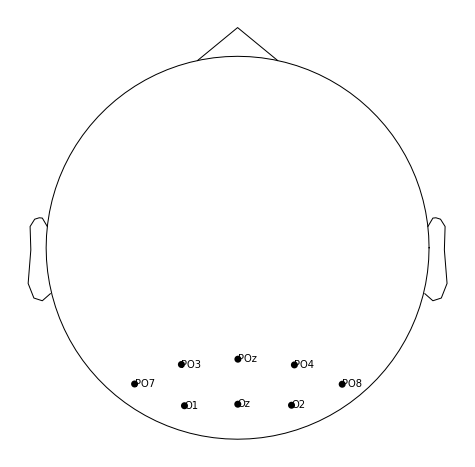

In [3]:
sphere=(0,-25,0,100)
_ = raw.plot_sensors(show_names=True, kind='topomap', sphere=sphere)

Plot the raw EEG data:

Using matplotlib as 2D backend.
Opening raw-browser...


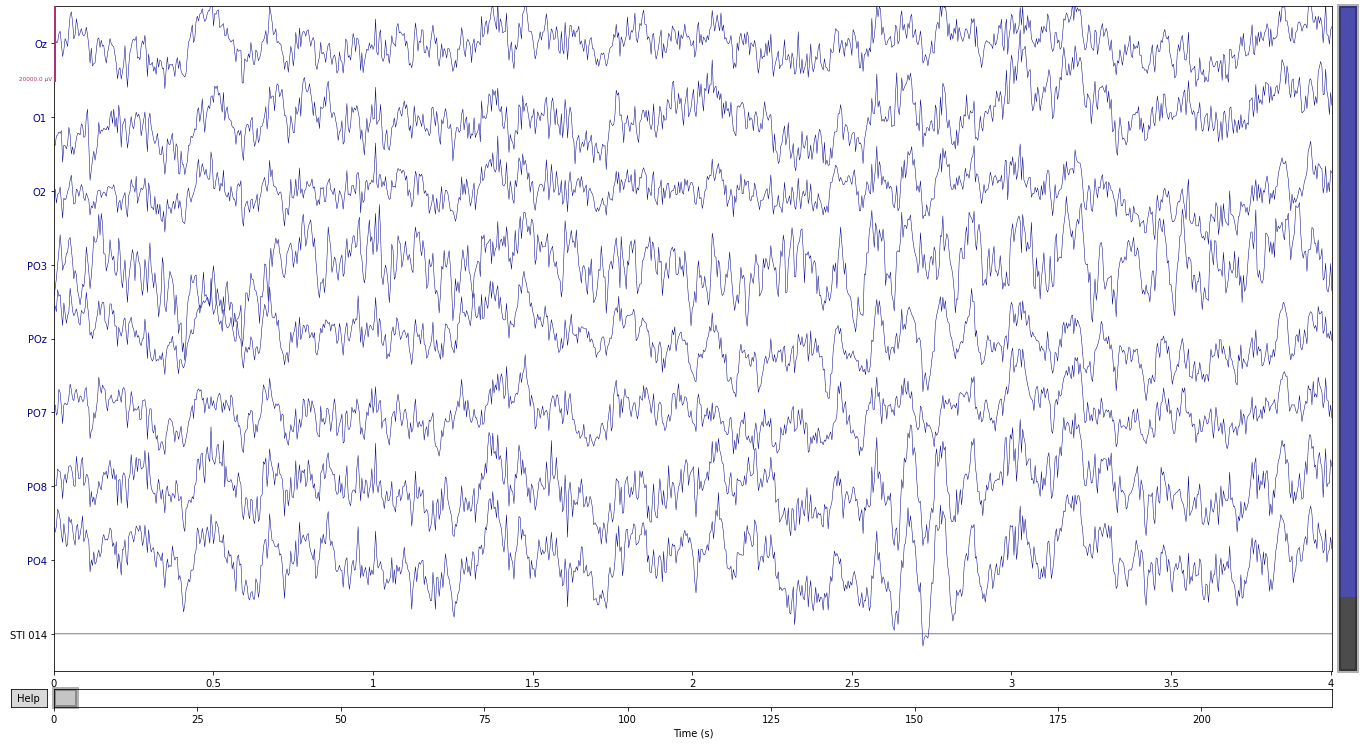

In [4]:
_ = raw.plot(duration=4, color={'eeg':'darkblue'}, scalings=dict(eeg=1e-2))

Or plot the power spectral density (psd). The psd applies a Fourier transform and visualizes the frequency content of the EEG signal. Notice the large peak at 50Hz (and its harmonic at 100=50\*2Hz) caused by noise from the power grid alternating at 50Hz, and the increase in activity from 8-12Hz indicating alpha activity in the EEG. Generally, the psd has a *1/f* characteristic, meaning that lower frequencies will have relatively higher power regardless of specific relevant brain activity occurring at these frequencies. Because no preprocessing was applied here, the SSVEP stimulation frequencies are not yet clearly visible from the psd.

Effective window size : 8.000 (s)


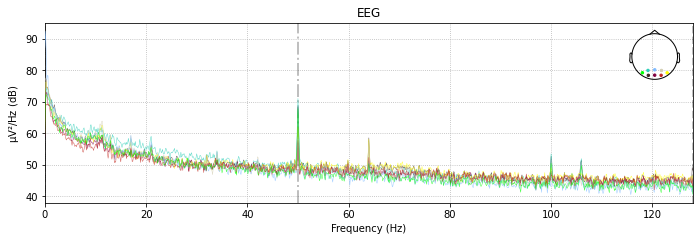

In [5]:
_ = raw.plot_psd(sphere=sphere)

Finally, to make preprocessing and classification easier, MNE can extract events that are recorded in a stimulation channel in the EEG. For SSVEP, these events signify the onsets of the stimulations of different targets. Events can also be used as classes for classification the three SSVEP different frequencies.

In [6]:
import numpy as np
from mne import pick_types

stim_idc = pick_types(raw.info, eeg=False, stim=True)
[raw.ch_names[i] for i in stim_idc]

['STI 014']

In [7]:
from mne import find_events
from mne.viz import plot_events

events = find_events(raw)
events

32 events found
Event IDs: [1 2 3 4]


array([[ 3965,     0,     1],
       [ 5629,     0,     1],
       [ 7293,     0,     1],
       [ 8957,     0,     1],
       [10621,     0,     1],
       [12285,     0,     1],
       [13949,     0,     1],
       [15613,     0,     1],
       [17277,     0,     3],
       [18941,     0,     4],
       [20605,     0,     2],
       [22269,     0,     3],
       [23933,     0,     2],
       [25597,     0,     4],
       [27261,     0,     2],
       [28925,     0,     3],
       [30589,     0,     4],
       [32253,     0,     3],
       [33917,     0,     4],
       [35581,     0,     2],
       [37245,     0,     4],
       [38909,     0,     2],
       [40573,     0,     3],
       [42237,     0,     4],
       [43901,     0,     2],
       [45565,     0,     3],
       [47229,     0,     2],
       [48893,     0,     4],
       [50557,     0,     3],
       [52221,     0,     4],
       [53885,     0,     3],
       [55549,     0,     2]])

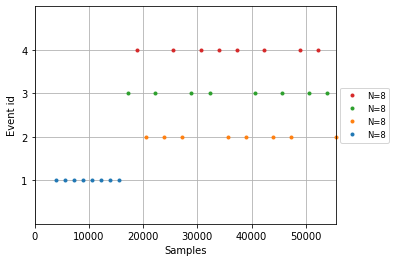

In [8]:
_= plot_events(events)

## MOABB

The Mother Of All BCI Benchmarks is a package for interfacing with various EEG-BCI datasets from multiple paradigms and defines a framework to benchmark algorithms.

More information and documentation can be found at https://neurotechx.github.io/moabb/

### Paradigm

MOABB can implement standardized preprocessing pipelines that can be applied to multiple datasets to fairly compare these in a benchmark. MOABB calls a preprocessing pipeline a paradigm.

In [9]:
from moabb.paradigms import SSVEP
dataset.event_id= {
    '13': 2,
    '17': 4,
    '21': 3,    
    'rest': 1,
}
paradigm = SSVEP(fmin=10, fmax=25, n_classes=3)

Choosing the first 3 classes from all possible events


### Pipelines

Classification algorithms can equally be defined independent of the dataset and are implemented using [Scikit-Learn pipelines](https://scikit-learn.org/stable/modules/compose.html#pipeline) to allow for multiple feature extraction, transformation and classification steps.

In [10]:
from sklearn.pipeline import make_pipeline
from moabb.pipelines import SSVEP_CCA


interval = dataset.interval
freqs = paradigm.used_events(dataset)

pipelines = dict()
pipelines["CCA"] = make_pipeline(
    SSVEP_CCA(interval=interval, freqs=freqs, n_harmonics=3)
)

### Evaluation

Finally, when we have defined a paradigm and some pipelines, we can run the benchmark and evaluate BCI algorithm performance.

In [11]:
from moabb.evaluations import WithinSessionEvaluation


evaluation = WithinSessionEvaluation(
    paradigm=paradigm,
    datasets=dataset,
    suffix='ssvep_workshop_moabb_intro',
    overwrite=True
)
results = evaluation.process(pipelines)
results

SSVEP Exoskeleton-WithinSession: 100%|█████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.85it/s]


,score,time,samples,subject,session,channels,n_sessions,dataset,pipeline
0,0.642222,0.038950,48.0,1,session_0,8,1,SSVEP Exoskeleton,CCA
1,0.497778,0.034838,48.0,2,session_0,8,1,SSVEP Exoskeleton,CCA
2,0.935556,0.036766,48.0,3,session_0,8,1,SSVEP Exoskeleton,CCA
3,0.877778,0.037287,48.0,4,session_0,8,1,SSVEP Exoskeleton,CCA
4,0.713333,0.038812,48.0,5,session_0,8,1,SSVEP Exoskeleton,CCA
5,0.584444,0.035998,48.0,6,session_0,8,1,SSVEP Exoskeleton,CCA
6,0.931429,0.058899,72.0,7,session_0,8,1,SSVEP Exoskeleton,CCA
7,0.895556,0.036923,48.0,8,session_0,8,1,SSVEP Exoskeleton,CCA
8,0.713333,0.037005,48.0,9,session_0,8,1,SSVEP Exoskeleton,CCA
9,0.605263,0.071977,96.0,10,session_0,8,1,SSVEP Exoskeleton,CCA


<Figure size 432x288 with 0 Axes>

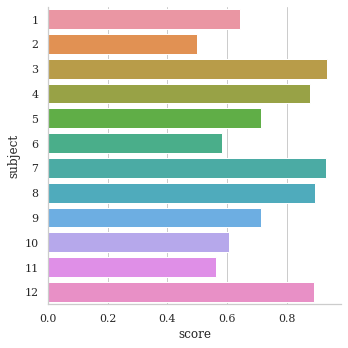

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
sns.catplot(kind='bar', x="score", y="subject", hue=None, data=results)

## References

[1] Emmanuel K. Kalunga, Sylvain Chevallier, Quentin Barthelemy. “Online SSVEP-based BCI using Riemannian Geometry”. Neurocomputing, 2016. arXiv report: https://arxiv.org/abs/1501.03227